# Lab | Cross Validation

For this lab, we will build a model on customer churn binary classification problem. You will be using `files_for_lab/Customer-Churn.csv` file.

### Instructions

1. Apply SMOTE for upsampling the data

    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve

In [3]:
path = 'files_for_lab/Customer-Churn.csv'
data = pd.read_csv(path)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [4]:
# Check null values
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Check data types
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Change total charges to numerical data
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors="coerce")

In [7]:
# Check if the shift to numerical data created any NaN values
data['TotalCharges'].isna().sum()

11

In [8]:
# Check the amount of NaNs relative to the dataset:
percent = data['TotalCharges'].isna().sum() * 100 / data.shape[0]
print(percent)

0.15618344455487718


In [9]:
# As the rows represent 0.15% of the dataset, we could remove them:
data.dropna(inplace=True)

In [10]:
# X - y split
y = data['Churn']
X = data.drop(y.name, axis=1)

In [11]:
# Num - cat split
num = X.select_dtypes(np.number)
cat = X.select_dtypes(object)

In [12]:
# Encode categoricals
cat = pd.get_dummies(cat, columns=cat.columns, drop_first=True)

In [13]:
# Reconnect num & cat columns
X = pd.concat([num, cat], axis=1)

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, \
    random_state=42)

In [15]:
# Apply SMOTE oversampling to the train data
X_sm, y_sm = SMOTE().fit_resample(X_train, y_train)

In [29]:
# Function to plot confusion matrices & calculate prediction scores
def validate_model(y_pred, y_test):
    cm = confusion_matrix(y_pred, y_test)
    sns.heatmap(cm, annot=True, fmt='g', xticklabels=["No", "Yes"], \
        yticklabels=["No", "Yes"])
    plt.show()
    print("Accuracy:", 100 * round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", 100 * round(precision_score(y_test, y_pred, pos_label="Yes"), 4))
    print("Recall:", 100 * round(recall_score(y_test, y_pred, pos_label="Yes"), 4))

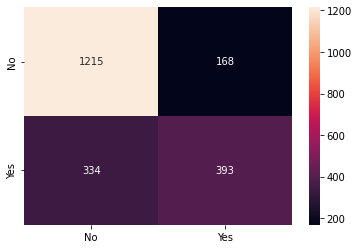

Accuracy: 76.21
Precision: 54.059999999999995
Recall: 70.05


In [30]:
# Fit logistic regression linear_model to data
linear_model = LogisticRegression(max_iter=200) #Increased number of iterations \
                                                #due to initial iterations > 100
linear_model.fit(X_sm, y_sm)
y_pred = linear_model.predict(X_test)
validate_model(y_pred, y_test)

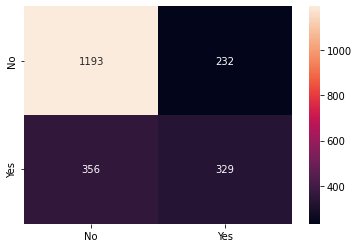

Accuracy: 72.13000000000001
Precision: 48.03
Recall: 58.650000000000006


In [31]:
# Fit Decision Tree tree_model to data
tree_model = DecisionTreeClassifier()
tree_model.fit(X_sm, y_sm)
y_pred = tree_model.predict(X_test)
validate_model(y_pred, y_test)

2. Apply TomekLinks for downsampling

    - It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.
    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.
    - You can also apply this algorithm one more time and check the how the imbalance in the two classes changed from the last time.

In [33]:
# Apply Tomek-Links undersampling to the train data
X_tl, y_tl = TomekLinks().fit_resample(X_train, y_train)

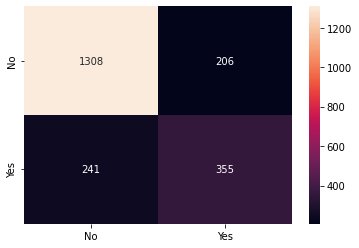

Accuracy: 78.82000000000001
Precision: 59.56
Recall: 63.28


In [35]:
# Fit logistic regression model to data
model = LogisticRegression(max_iter=200)
model.fit(X_tl, y_tl)
y_pred = model.predict(X_test)
validate_model(y_pred, y_test)

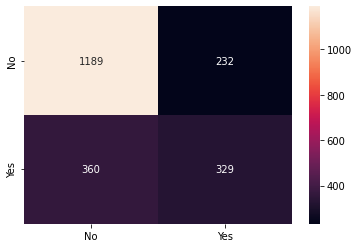

Accuracy: 71.94
Precision: 47.75
Recall: 58.650000000000006


In [36]:
# Fit Decision Tree model to data
model = DecisionTreeClassifier()
model.fit(X_sm, y_sm)
y_pred = model.predict(X_test)
validate_model(y_pred, y_test)